# Exploratory Data Analysis: Active Apps and Phone Usage

In [1]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Loading and Joining Tables

In [2]:
app_events=pd.read_csv('app_events.csv')
app_labels= pd.read_csv('app_labels.csv')
events= pd.read_csv('events.csv')
label_categories= pd.read_csv('label_categories.csv')
phone_brand= pd.read_csv('phone_brand_device_model.csv')
gender_age_train= pd.read_csv('gender_age_train.csv')
gender_age_test= pd.read_csv('gender_age_test.csv')

In [8]:
#Joining App Labels
app_labels_merged = app_labels.merge(label_categories, on='label_id', how='left')
app_labels_merged['category'] = app_labels_merged['category'].astype(str)
app_labels_merged['app']= app_encoder.transform(app_labels_merged['app_id'])
app_labels_merged.drop(['app_id','label_id'], axis=1, inplace=True)

In [4]:
app_events_merged = events.merge(app_events , on='event_id' )

In [3]:
#Encode app_ids
app_encoder = LabelEncoder().fit(app_labels['app_id'])
app_events_merged['apps'] = app_encoder.transform(app_events_merged['app_id'])

In [6]:
app_events_merged.drop(['event_id', 'app_id'], axis=1, inplace=True)

In [7]:
#Joining with train set
train_apps = gender_age_train.merge(app_events_merged, on='device_id', how='left')
train_apps.dropna(inplace=True)
train_apps.drop_duplicates(inplace=True)
train_apps['apps'] = train_apps['apps'].astype(int)

In [10]:
train_apps.sample(5)

,device_id,gender,age,group,timestamp,longitude,latitude,is_installed,is_active,apps
4406037,-8106907372370267374,F,27,F27-28,2016-05-07 15:09:06,0.00,0.00,1.0,1.0,91064
138793,2010853208400422281,F,26,F24-26,2016-05-03 10:54:22,0.00,0.00,1.0,0.0,52603
1787800,4010143991042312665,F,23,F23-,2016-05-01 14:48:14,0.00,0.00,1.0,1.0,91064
10726591,7219455262010854222,M,40,M39+,2016-05-06 21:26:20,119.80,33.79,1.0,1.0,30651
7914743,3074308677943390456,M,24,M23-26,2016-05-06 22:36:16,108.58,34.42,1.0,0.0,22712


In [12]:
train_apps['device_id'].nunique()

23290

## Total Apps and Active Apps per person


In [108]:
# grabbing only the rows with provided data for 'is_installed' and 'is_active
train_total_apps = gender_age_train[gender_age_train['device_id'].isin(events['device_id'])]

In [146]:
#creating new column 'total_active' and 'total_apps' 
unique_apps = train_total_apps['device_id'].unique()
for i, app in tqdm(enumerate(unique_apps)):

    train_total_apps['total_active'][i] = (
                                     train_apps[train_apps['device_id']==app]
                                     [train_apps[train_apps['device_id']==app]
                                     ['is_active']==1]
                                     ['apps'].nunique()
                                     )
    
    train_total_apps['total_apps'][i] = train_apps[train_apps['device_id']==app]['apps'].nunique()

train_total_apps.to_pickle('train_total_apps.pkl')

0it [00:00, ?it/s]C:\Users\Papasmurfff\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Papasmurfff\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Papasmurfff\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
23309it [1:17:06,  5.31it/s]


In [13]:
train_total_apps= pd.read_pickle('train_total_apps.pkl')

In [14]:
train_total_apps.head()

,device_id,gender,age,group,total apps,total_active,total_apps
0,-8260683887967679142,M,35,M32-38,20,6,53
1,7477216237379271436,F,37,F33-42,20,16,30
2,6352067998666467520,M,32,M32-38,20,15,20
3,1508636020748379883,F,28,F27-28,20,18,24
4,-6876541075223249434,M,75,M39+,20,34,96


### Bar Plot showing average installed apps vs average active apps

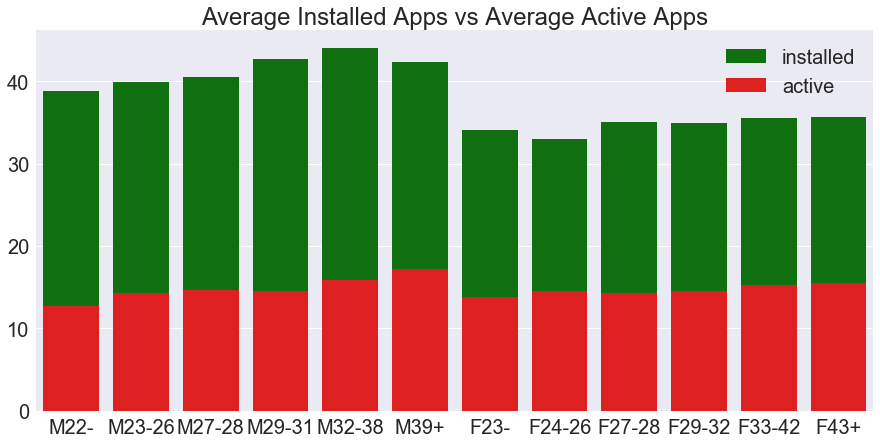

In [15]:
columns=['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']
total_apps = pd.DataFrame(columns=columns, index=range(12))
active_apps = pd.DataFrame(columns=columns, index=range(12))

for column in columns:

    total_apps[column] = train_total_apps[train_total_apps['group']==column]['total_apps'].mean()
    active_apps[column] = train_total_apps[train_total_apps['group']==column]['total_active'].mean()

fig=plt.figure(figsize=(15,7))
sns.set(font_scale=2)
sns.barplot(data=total_apps, color='green', label='installed')
sns.barplot(data=active_apps, color='red', label='active')
plt.title('Average Installed Apps vs Average Active Apps')
plt.legend()
plt.show()

# Popular Apps

In [19]:
train_apps.head()

,device_id,gender,age,group,timestamp,longitude,latitude,is_installed,is_active,apps
2,-8260683887967679142,M,35,M32-38,2016-05-01 14:23:37,0.0,0.0,1.0,0.0,82007
3,-8260683887967679142,M,35,M32-38,2016-05-01 14:23:37,0.0,0.0,1.0,0.0,29719
4,-8260683887967679142,M,35,M32-38,2016-05-01 14:23:37,0.0,0.0,1.0,0.0,93807
5,-8260683887967679142,M,35,M32-38,2016-05-01 14:23:37,0.0,0.0,1.0,0.0,3068
6,-8260683887967679142,M,35,M32-38,2016-05-01 14:23:37,0.0,0.0,1.0,1.0,61535


In [20]:
train_apps.drop(['timestamp','longitude', 'latitude', 'is_installed',], axis=1, inplace=True)

In [21]:
train_apps.shape

(12129881, 6)

In [22]:
# this will make sure the same apps do not get counted twice per personn

train_apps_active = train_apps[train_apps['is_active']==1]

In [23]:
train_apps_active.shape

(4747466, 6)

In [24]:
train_apps_active[train_apps_active['group']=='M22-']['apps'].value_counts()[:15]

110157    18729
91064     18286
82340     10760
60083      8159
39760      6916
52193      5643
88699      4894
99975      4039
77172      3789
14853      3624
13609      3442
4071       3165
93433      3069
111588     3059
98793      2967
Name: apps, dtype: int64

### # of times phone was used in 1 week

In [16]:
groups = ['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']

average_usage = pd.DataFrame(columns = groups, index=range(1))

for group in groups:
    
    #summing all unique timestamps, each timestamp indicates phone usage
    sum_timestamps_count = (    sum(train_apps[train_apps['group']==group]
                                    .groupby(['device_id'])['timestamp'].nunique().values)
                            )

    timestamp_count = (    len(train_apps[train_apps['group']==group]
                              .groupby(['device_id'])['timestamp'].nunique().values)
                      )

    average_usage[group] = sum_timestamps_count/timestamp_count

average_usage


,M22-,M23-26,M27-28,M29-31,M32-38,M39+,F23-,F24-26,F27-28,F29-32,F33-42,F43+
0,18.441347,23.286643,23.801427,25.583574,28.553925,29.251833,15.8337,20.001754,20.024008,19.761355,22.789301,21.794399


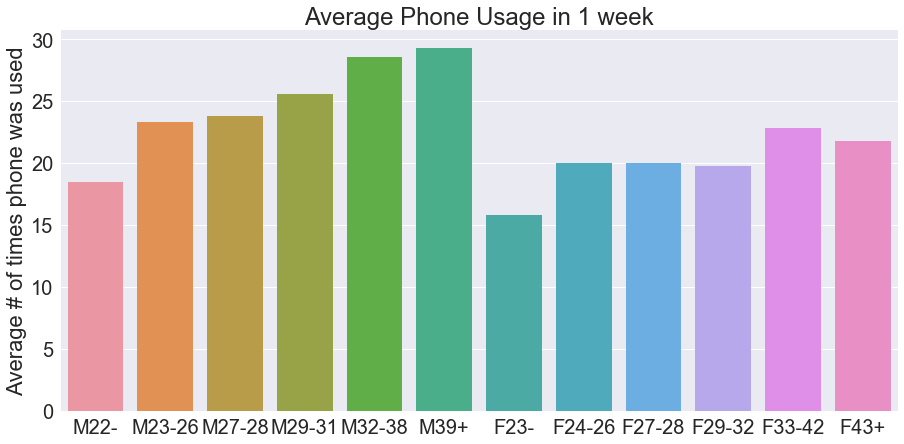

In [18]:
fig = plt.figure(figsize=(15,7))
sns.set(font_scale=2)
sns.barplot(data = average_usage)
plt.title('Average Phone Usage in 1 week')
plt.ylabel('Average # of times phone was used')